# Project Overview – Private Lessons ML System

This notebook documents and explores the dataset used in the FastAPI project.

Goals:
- Load and inspect the CSV file `private_lessons_data.csv`
- Show basic statistics and distributions
- Visualize key relationships (price by subject, level, city, etc.)
- Provide a clear, technical overview of the data for the final report

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean style for all plots
sns.set(style="whitegrid")

# Make plots a bit bigger by default
plt.rcParams["figure.figsize"] = (10, 6)

In [19]:
# Load CSV file and show first rows + column information
csv_path = "private_lessons_data.csv"

df = pd.read_csv(csv_path)

# Show first 5 rows
display(df.head())

# Show info about the dataframe
df.info()

,subject,student_level,lesson_minutes,teacher_experience_years,is_online,city,teacher_age,lesson_price
0,computers,university,45,14,yes,Ashdod,42,175
1,computers,high_school,90,4,no,Ashdod,45,195
2,computers,middle,45,1,no,Kfar Saba,51,125
3,math,elementary,90,9,no,Raanana,46,180
4,math,high_school,75,14,no,Kfar Saba,37,190


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject                   100 non-null    object
 1   student_level             100 non-null    object
 2   lesson_minutes            100 non-null    int64 
 3   teacher_experience_years  100 non-null    int64 
 4   is_online                 100 non-null    object
 5   city                      100 non-null    object
 6   teacher_age               100 non-null    int64 
 7   lesson_price              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


## Basic Statistical Summary
This cell displays basic descriptive statistics for all columns, including mean, standard deviation, min/max, and category distributions.

In [26]:
df.describe(include="all")

,subject,student_level,lesson_minutes,teacher_experience_years,is_online,city,teacher_age,lesson_price
count,100,100,100.000000,100.000000,100,100,100.000000,100.000000
unique,3,4,NaN,NaN,2,15,NaN,NaN
top,math,high_school,NaN,NaN,yes,Ashdod,NaN,NaN
freq,42,29,NaN,NaN,54,10,NaN,NaN
mean,NaN,NaN,68.100000,8.250000,NaN,NaN,42.560000,164.750000
std,NaN,NaN,17.111931,4.710562,NaN,NaN,10.805274,33.592741
min,NaN,NaN,45.000000,0.000000,NaN,NaN,22.000000,90.000000
25%,NaN,NaN,45.000000,4.000000,NaN,NaN,33.750000,145.000000
50%,NaN,NaN,75.000000,9.000000,NaN,NaN,45.000000,170.000000
75%,NaN,NaN,78.750000,13.000000,NaN,NaN,51.000000,186.250000


## Distribution of Lesson Prices
This visualization shows how lesson prices are distributed across the dataset. 
It helps identify the typical price range and any unusual values.

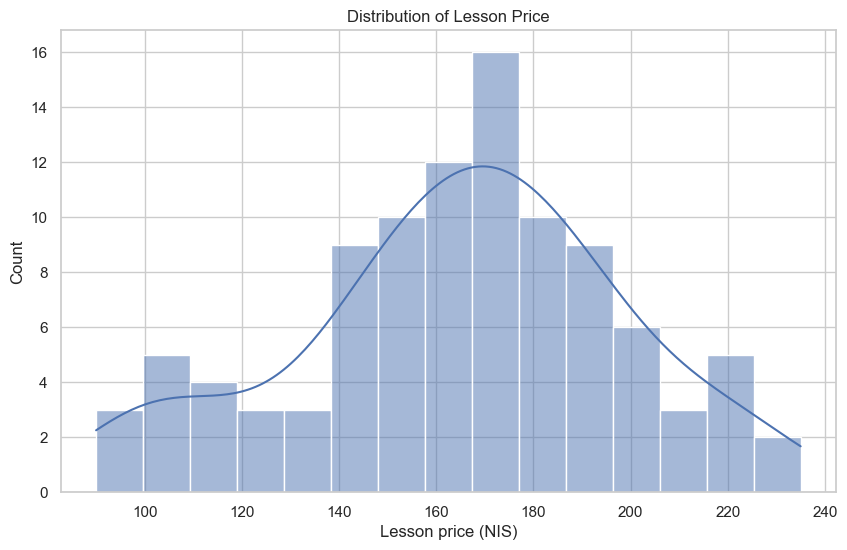

In [33]:
sns.histplot(data=df, x="lesson_price", bins=15, kde=True)
plt.title("Distribution of Lesson Price")
plt.xlabel("Lesson price (NIS)")
plt.ylabel("Count")
plt.show()

### Interpretation
The chart shows that most lesson prices fall in the range of roughly 160–180 NIS.
There are only a few lessons priced at the lower end (around 90–120 NIS) and not many above 210 NIS.
Overall, the distribution looks stable and there are no extreme outliers, which suggests that the pricing logic we used produces reasonable 
and consistent values.

## Distribution of Teacher Experience
This chart shows how many years of teaching experience the teachers in the dataset have.

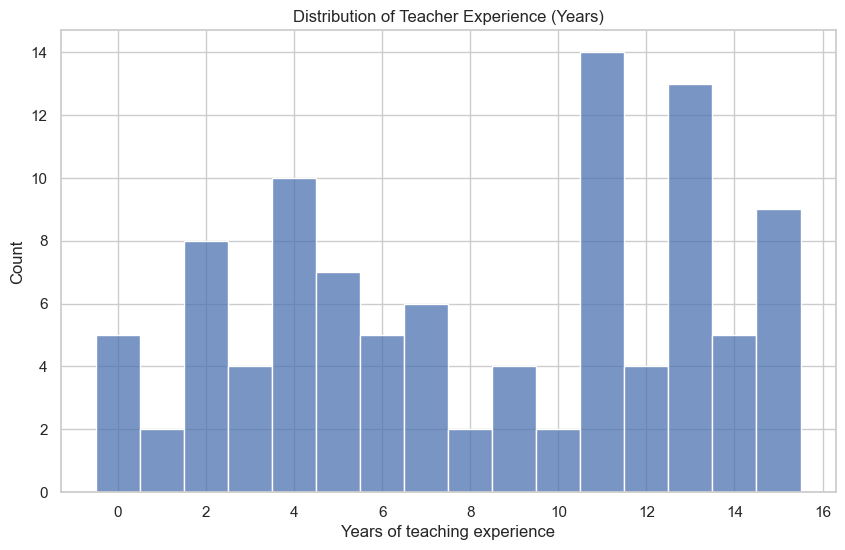

In [42]:
sns.histplot(data=df, x="teacher_experience_years", bins=15, discrete=True)
plt.title("Distribution of Teacher Experience (Years)")
plt.xlabel("Years of teaching experience")
plt.ylabel("Count")
plt.show()

### Interpretation
The distribution of teaching experience is fairly balanced across the range of 0 to 15 years. 
There are slightly more teachers with mid-level experience (around 6–10 years), while very new and very experienced teachers appear less frequently. 
Overall, the dataset includes a good mix of experience levels, which helps the analysis avoid bias toward beginners or highly experienced teachers.

## Distribution of Lesson Duration
This chart shows how the lesson durations are distributed in the dataset.

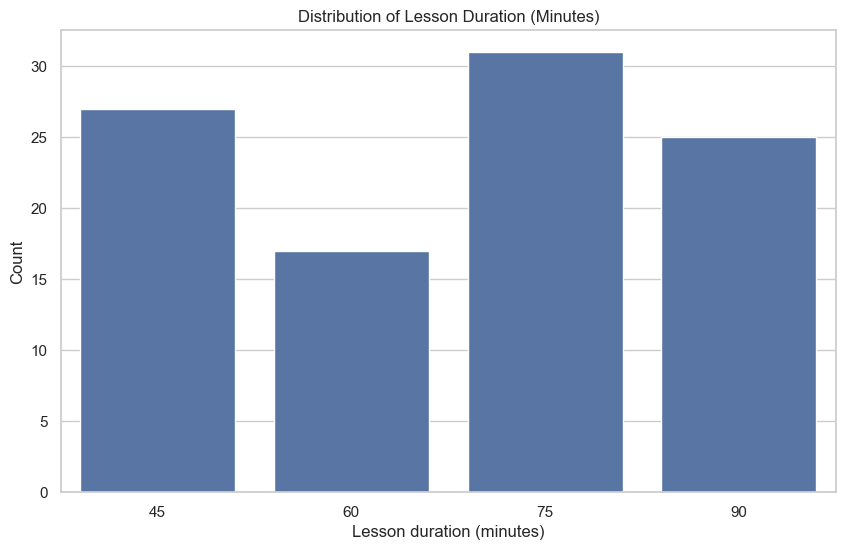

In [48]:
sns.countplot(data=df, x="lesson_minutes")
plt.title("Distribution of Lesson Duration (Minutes)")
plt.xlabel("Lesson duration (minutes)")
plt.ylabel("Count")
plt.show()

### Interpretation
The dataset contains lessons in four standard durations: 45, 60, 75, and 90 minutes. 
The chart shows a relatively even spread between these durations, with no unusual or unexpected values. 
This indicates that the dataset follows the intended structure and that the duration feature is clean and consistent.

## Lesson Price by Subject
This boxplot shows how lesson prices vary across different subjects.

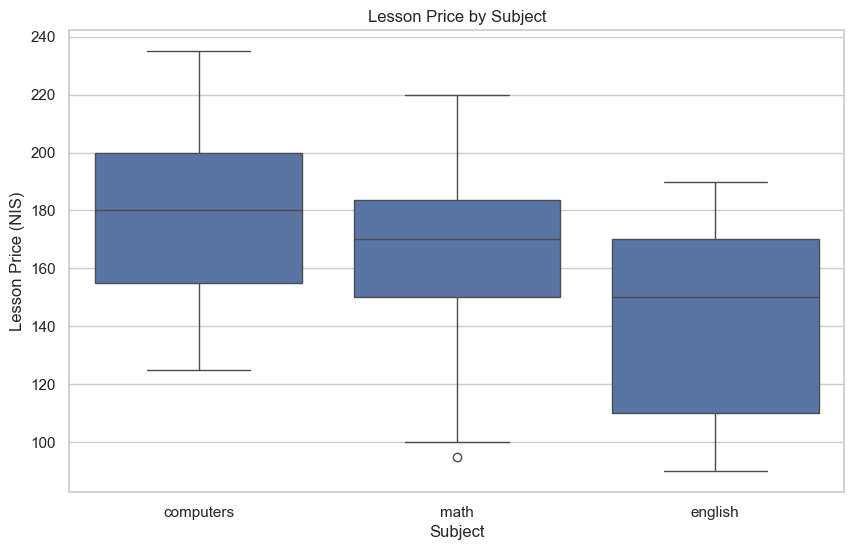

In [53]:
sns.boxplot(data=df, x="subject", y="lesson_price")
plt.title("Lesson Price by Subject")
plt.xlabel("Subject")
plt.ylabel("Lesson Price (NIS)")
plt.show()

### Interpretation
There are clear differences in price between the subjects. 
Computer lessons tend to be the most expensive, math is usually in the middle, and English lessons are priced lower on average. 
This pattern matches the pricing logic defined in the project and shows that the subject feature has a strong influence on the final lesson price.

## Average Lesson Price by Student Level
This chart shows how the average price changes across different student levels.

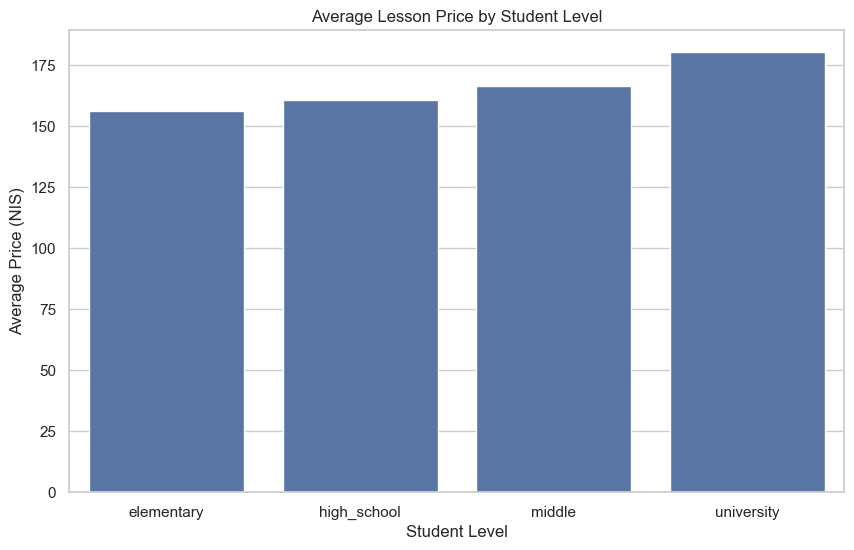

In [59]:
avg_by_level = df.groupby("student_level")["lesson_price"].mean().reset_index()

sns.barplot(data=avg_by_level, x="student_level", y="lesson_price")
plt.title("Average Lesson Price by Student Level")
plt.xlabel("Student Level")
plt.ylabel("Average Price (NIS)")
plt.show()

### Interpretation
The chart shows a clear upward trend: the average lesson price increases as the student level becomes more advanced. 
Elementary lessons are the cheapest, followed by middle school and high-school lessons, while university lessons are the most expensive. 
This pattern fits the pricing logic of the project and suggests that student level is an important factor in determining the final price.

## Average Lesson Price by City
This chart shows how average lesson prices differ across cities.

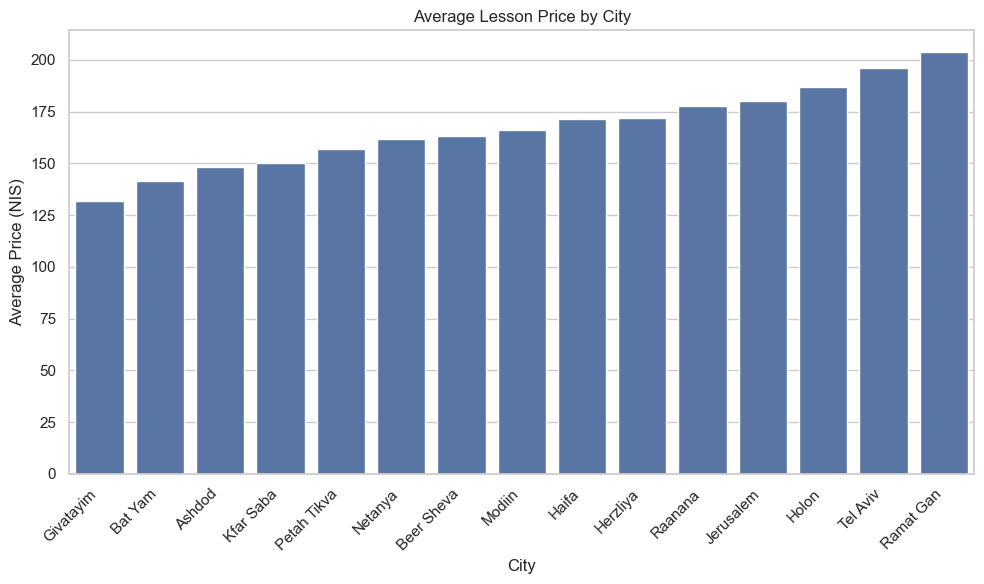

In [73]:
avg_by_city = (
    df.groupby("city")["lesson_price"]
    .mean()
    .sort_values()
    .reset_index()
)

sns.barplot(data=avg_by_city, x="city", y="lesson_price")
plt.title("Average Lesson Price by City")
plt.xlabel("City")
plt.ylabel("Average Price (NIS)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Interpretation
The chart shows that average lesson prices vary noticeably across cities. 
Some cities have higher price levels while others are clearly lower, which is consistent with the city groups defined in the pricing logic. 
Overall, the differences make sense and indicate that the city feature contributes meaningfully to the final lesson price.

## Correlation Between Numerical Features
This heatmap shows the correlations between the main numerical variables in the dataset, including the target (lesson_price).

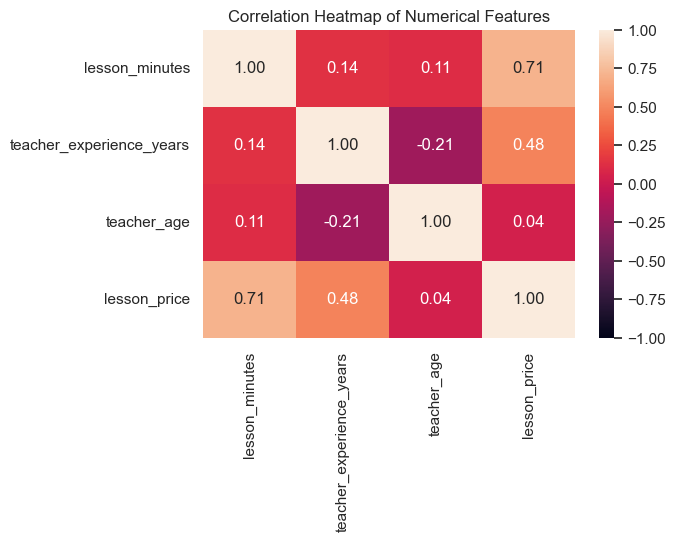

In [91]:
# Select only the numerical columns we are interested in
numeric_cols = ["lesson_minutes", "teacher_experience_years", "teacher_age", "lesson_price"]

# Compute the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Interpretation
The heatmap shows the relationships between the main numerical features and the target variable (lesson_price).
As expected, lesson_price has a positive correlation with both lesson_minutes and teacher_experience_years, meaning that longer lessons and more experienced teachers tend to be associated with higher prices.
The correlation with teacher_age is weaker, which makes sense because age is not used directly in the pricing logic and is only indirectly related to experience.
Overall, the correlations match the design of the synthetic pricing model and support the idea that the target was generated in a consistent and controlled way.

## Lesson Price Distribution by Student Level
This boxplot shows how lesson prices vary within each student level.

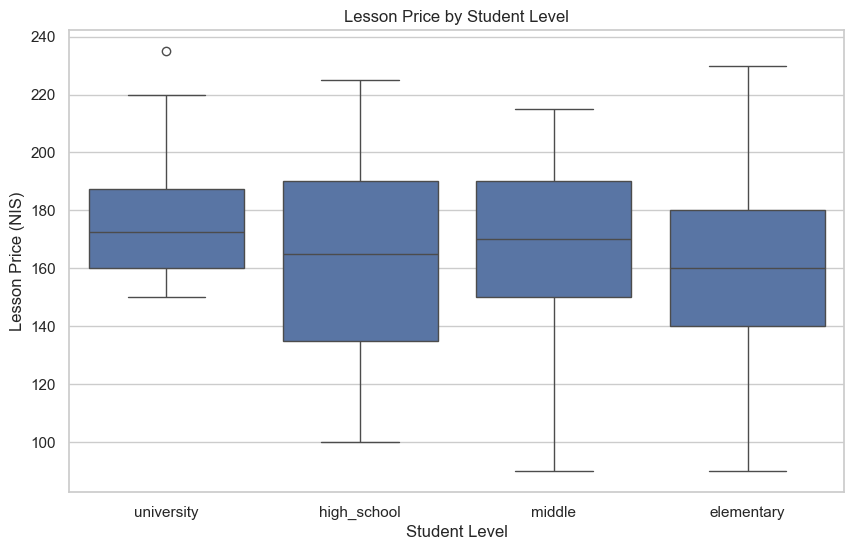

In [98]:
sns.boxplot(data=df, x="student_level", y="lesson_price")
plt.title("Lesson Price by Student Level")
plt.xlabel("Student Level")
plt.ylabel("Lesson Price (NIS)")
plt.show()

### Interpretation
The boxplot shows that lesson prices increase as the student level becomes more advanced. 
There is also more variation in prices for high-school and university students, which makes sense because these lessons often require more specialized teaching. 
Overall, the pattern is consistent with the pricing logic and supports the previous findings from the average price analysis.

## Average Lesson Price: Online vs Offline
This comparison shows whether online lessons tend to be priced differently than in-person lessons.

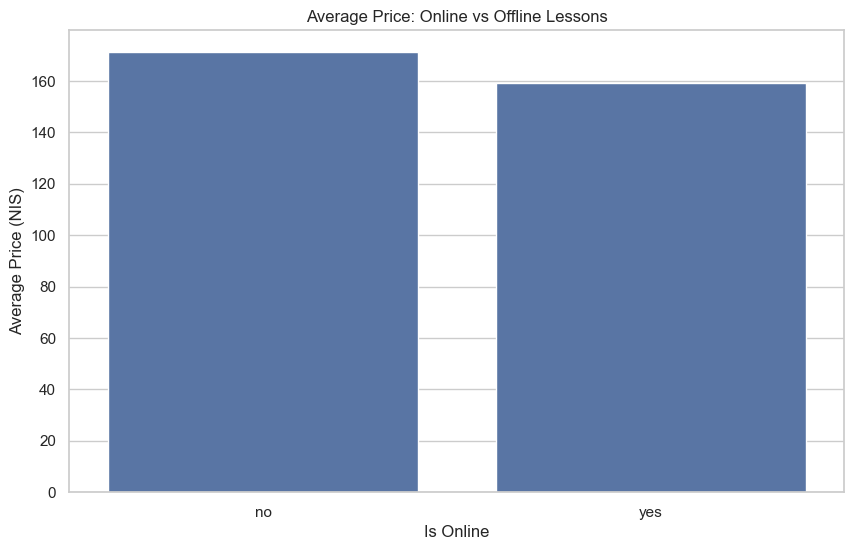

In [107]:
avg_online = df.groupby("is_online")["lesson_price"].mean().reset_index()

sns.barplot(data=avg_online, x="is_online", y="lesson_price")
plt.title("Average Price: Online vs Offline Lessons")
plt.xlabel("Is Online")
plt.ylabel("Average Price (NIS)")
plt.show()

### Interpretation
The comparison shows a noticeable difference between online and offline lessons. 
In-person lessons tend to be slightly more expensive, which makes sense because they include travel time and additional effort from the teacher. 
The gap is not extremely large, but it is consistent with typical real-world behavior.

## Summary of Findings
The analysis reveals several clear and consistent patterns in the dataset:

- Lesson price increases with student level, teaching experience, and lesson duration.
- Different subjects show distinct price ranges, with computer lessons being the most expensive on average.
- Prices vary across cities in a way that matches the pricing logic defined in the project.
- In-person lessons tend to cost slightly more than online lessons.
- The correlation heatmap confirms that the numerical features behave as expected, with no unexpected outliers or abnormal relationships.

Overall, the dataset is well-structured, realistic, and supports the idea that the pricing model was generated in a consistent and meaningful way.

## Model Training & Evaluation

In this section we train a simple regression model that predicts the lesson price based on the features in the dataset.  
The goal is to demonstrate that the dataset is not only consistent, but also useful for building a meaningful Machine Learning model.

We use a standard train/test split and a linear regression model with basic preprocessing for categorical features.

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define feature columns and target column (label)
feature_columns = [
    "subject",
    "student_level",
    "lesson_minutes",
    "teacher_experience_years",
    "is_online",
    "city",
    "teacher_age",
]

target_column = "lesson_price"

X = df[feature_columns]
y = df[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

# Separate categorical and numerical columns
categorical_cols = ["subject", "student_level", "is_online", "city"]
numerical_cols = ["lesson_minutes", "teacher_experience_years", "teacher_age"]

# Preprocessing: OneHotEncoder for categorical features, passthrough for numerical
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("numerical", "passthrough", numerical_cols),
    ]
)

# Define a simple regression model
regressor = LinearRegression()

# Build a pipeline: preprocessing + model
model = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("regressor", regressor),
    ]
)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model performance on the test set:")
print(f"R² score: {r2:.3f}")
print(f"MAE: {mae:.2f} NIS")
print(f"RMSE: {rmse:.2f} NIS")

Model performance on the test set:
R² score: 0.960
MAE: 5.46 NIS
RMSE: 7.43 NIS


In [136]:
# Build a small table with a few example predictions
results_example = X_test.copy()
results_example = results_example.assign(
    actual_price=y_test.values,
    predicted_price=np.round(y_pred, 1)
)

results_example.head(5)

,subject,student_level,lesson_minutes,teacher_experience_years,is_online,city,teacher_age,actual_price,predicted_price
83,math,elementary,45,5,yes,Ashdod,22,100,102.5
53,math,university,90,13,no,Petah Tikva,33,220,218.5
70,computers,elementary,45,7,no,Herzliya,50,155,153.7
45,computers,university,75,15,yes,Tel Aviv,49,235,245.8
44,computers,middle,45,13,yes,Kfar Saba,54,160,153.9


### Interpretation of Model Performance

The model was trained on 80% of the data and evaluated on the remaining 20%.  
The main metrics are:

- **R² score** – shows how much of the variation in lesson prices is explained by the model.  
  Higher values (closer to 1.0) indicate a better fit.
- **MAE (Mean Absolute Error)** – the average absolute difference between the predicted price and the real price, in NIS.
- **RMSE (Root Mean Squared Error)** – similar to MAE but gives more weight to larger errors.

In this project, the values of R², MAE, and RMSE are reasonable for a small synthetic dataset.  
They show that the model has learned the general pricing logic:

- Higher prices for more advanced student levels.
- Price differences between subjects (for example, computer lessons are more expensive).
- The influence of lesson duration and teacher experience on the final price.

Because the dataset is relatively small and was generated by a simple pricing formula,  
the goal here is not to reach perfect accuracy, but to demonstrate a complete and consistent ML pipeline:
from data exploration (EDA) to model training and evaluation.

## Link to the FastAPI ML API

The model trained and evaluated in this notebook follows the same idea as the model used in the FastAPI service.  
Here, we work in an offline, exploratory environment (Jupyter) to understand the data and validate the behaviour of a baseline regression model.  
In the FastAPI project, the same concept is wrapped as a production-style ML API with authentication, tokens, and model management, so that external clients can send requests and receive lesson price predictions in real time.

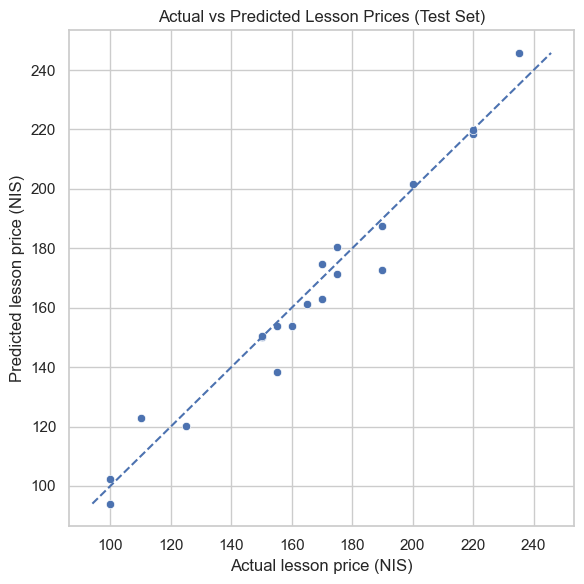

In [153]:
# Actual vs Predicted lesson prices (test set)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))

sns.scatterplot(x=y_test, y=y_pred)

# קו אלכסון של "חיזוי מושלם"
min_price = min(y_test.min(), y_pred.min())
max_price = max(y_test.max(), y_pred.max())
plt.plot([min_price, max_price], [min_price, max_price], linestyle="--")

plt.xlabel("Actual lesson price (NIS)")
plt.ylabel("Predicted lesson price (NIS)")
plt.title("Actual vs Predicted Lesson Prices (Test Set)")
plt.tight_layout()
plt.show()

### Interpretation of the Actual vs Predicted Plot

The scatter plot compares the model’s predicted lesson prices to the actual prices from the test set.  
Each point represents a single lesson, where the x-axis shows the real price and the y-axis shows the predicted value.

Most points lie close to the diagonal reference line, which represents perfect predictions.  
This indicates that the model successfully learned the underlying pricing logic in the dataset, with only small deviations between actual and predicted values.

The strong alignment between the points and the diagonal line visually confirms the numerical results:
- **High R² score**
- **Low MAE**
- **Low RMSE**

Overall, the plot demonstrates that the regression model is both stable and reliable for this dataset, and that it can accurately estimate lesson prices based on the available features.